# Sección 1: Cargar y Preprocesar Datos

## Librerias previas a instalar:

1. pip install tensorflow
2. pip install imblearn


Cargando datos...
Datos cargados: 2878 registros, 3 columnas
Columnas en el DataFrame:
Index(['username', 'timestamp', 'comment'], dtype='object')
Número de registros: 2878
Número de columnas: 3
Columnas en el DataFrame:
Index(['username', 'timestamp', 'comment'], dtype='object')

Primeras 10 filas del DataFrame:


,username,timestamp,comment
0,@MarcoGilerM,2023-09-11T13:37:46.000Z,eso no es todo al realizarse la transferencia ...
1,@JoseAnt40060050,2023-09-01T22:39:33.000Z,nunca entregaste un hospital para la zona sur ...
2,@MariaMa99904828,2023-05-31T00:22:19.000Z,a mas de adefesio sinverguenza charlatan cuand...
3,@patsurfer71,2023-03-30T12:27:34.000Z,jipijapa necesita un hospital general que pued...
4,@Joselui48173725,2023-02-01T13:43:37.000Z,hay jente que tienen caca en el serebropor k v...
5,@juancasaenz76,2023-01-31T18:21:38.000Z,x ej los dos funcionarios atacados a bala en p...
6,@radialvision,2023-01-30T20:57:29.000Z,noticias se trataria de la jueza genny guanol...
7,@mmendozabelen,2023-01-30T19:11:53.000Z,se trataria de la jueza genny guanoluisa delga...
8,@HRZManta,2022-07-08T20:08:41.000Z,este tipo de cirugias se realizan de forma pro...
9,@HRZManta,2022-06-13T16:33:54.000Z,esta unidad mantiene 1096 casos vinculados des...



Estadísticas descriptivas del DataFrame:


,username,timestamp,comment
count,2878,2878,2878
unique,1306,2874,2867
top,@Salud_CZ4,2022-12-15T15:15:06.000Z,peperuales excelente ministro soy especialist...
freq,240,2,3


Columna 'sentimiento' creada a partir de los comentarios.
Limpiando datos...
Columnas disponibles después de limpiar los datos: Index(['username', 'timestamp', 'comment', 'sentimiento', 'comment_limpio',
       'tokens'],
      dtype='object')


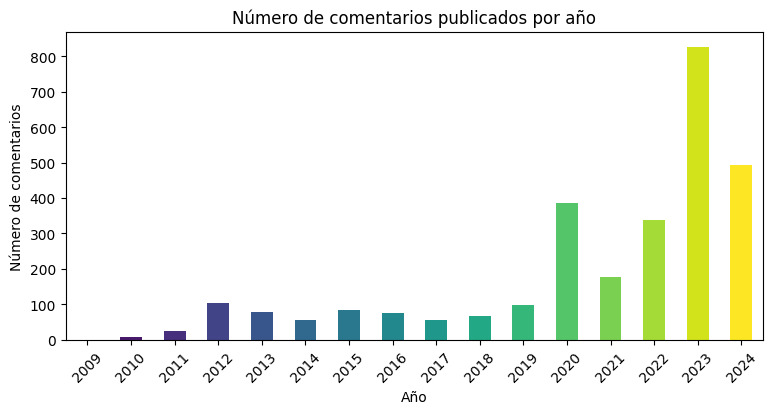

In [1]:
#!pip install tensorflow
# Sección 1: Cargar y Limpiar Datos
import pandas as pd
import numpy as np
import re 
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import display

# Función para limpiar texto
def limpiar_texto(text):
    text = text.lower()
    text = re.sub(r"[{}]".format(string.punctuation), "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Función para tokenizar texto
def tokenizar_texto(text):
    return text.split()

# Función para visualizar datos
def visualizar_datos(df):
    # Mostrar estadísticas básicas de los datos
    print(f"Número de registros: {df.shape[0]}")
    print(f"Número de columnas: {df.shape[1]}")
    print(f"Columnas en el DataFrame:\n{df.columns}")
    
    # Mostrar las primeras 10 filas del DataFrame en formato de tabla
    print("\nPrimeras 10 filas del DataFrame:")
    display(df.head(10))
    
    # Mostrar estadísticas descriptivas del DataFrame
    print("\nEstadísticas descriptivas del DataFrame:")
    display(df.describe(include='all'))

# Función para visualizar la distribución temporal de los comentarios por año
def visualizar_distribucion_temporal_anual(df):
    df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_localize(None)
    df['year'] = df['timestamp'].dt.year
    df_yearly = df.groupby('year').size()
    
    # Crear una paleta de colores
    colores = plt.cm.viridis(np.linspace(0, 1, len(df_yearly)))

    fig, ax = plt.subplots(figsize=(9, 4))
    df_yearly.plot(kind='bar', color=colores, ax=ax)

    ax.set_title('Número de comentarios publicados por año')
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de comentarios')
    plt.xticks(rotation=45)
    plt.show()

# Cargar datos
print("Cargando datos...")
df = pd.read_csv('datasets/datos_combinados_1.csv')
print(f"Datos cargados: {df.shape[0]} registros, {df.shape[1]} columnas")
print(f"Columnas en el DataFrame:\n{df.columns}")

# Visualizar datos
visualizar_datos(df)

# Verificar si la columna 'sentimiento' existe
if 'sentimiento' not in df.columns:
    # Si no existe, agregar una columna 'sentimiento' con valores de ejemplo para la demostración
    # Aquí deberías definir cómo extraer los sentimientos de los datos existentes
    # Por ejemplo, podríamos asumir una función de ejemplo para extraer el sentimiento del comentario
    def extraer_sentimiento(comment):
        positive_terms = ['bueno', 'excelente', 'feliz', 'positivo']
        negative_terms = ['malo', 'horrible', 'triste', 'negativo']
        
        for term in positive_terms:
            if term in comment:
                return 'positivo'
        for term in negative_terms:
            if term in comment:
                return 'negativo'
        return 'neutral'
    
    df['sentimiento'] = df['comment'].apply(extraer_sentimiento)
    print("Columna 'sentimiento' creada a partir de los comentarios.")
else:
    print("Columna 'sentimiento' ya existe en el DataFrame.")

# Limpieza de datos
print("Limpiando datos...")
df['comment_limpio'] = df['comment'].apply(limpiar_texto)
df['tokens'] = df['comment_limpio'].apply(tokenizar_texto)
print(f"Columnas disponibles después de limpiar los datos: {df.columns}")

# Visualizar la distribución temporal de los comentarios por año
visualizar_distribucion_temporal_anual(df)

# SECCION 1.5. Cargar y Preprocesar Datos.

[nltk_data] Downloading package stopwords to C:\Users\Erick
[nltk_data]     Carreño\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Algunas stopwords en español: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']
Palabras más frecuentes por año (sin stopwords):

Año 2009:
[('1', 1), ('3', 1), ('calceta', 1), ('casi', 1), ('curva', 1), ('diagramada', 1), ('empate', 1), ('falta', 1), ('hospital', 1), ('info', 1)]

Año 2010:
[('hospital', 9), ('calceta', 6), ('manabi', 3), ('campo', 2), ('d', 2), ('llevarme', 2), ('si', 2), ('3', 1), ('4', 1), ('acevedo', 1)]

Año 2011:
[('hospital', 27), ('calceta', 8), ('pajan', 6), ('d', 5), ('manabi', 5), ('q', 5), ('alfaro', 4), ('director', 4), ('flavio', 4), ('ajungbluth', 3)]

Año 2012:
[('hospital', 104), ('flavio', 26), ('alfaro', 25), ('rocafuerte', 24), ('mashirafael', 20), ('pajan', 16), ('basico', 14), ('d', 14), ('director', 14), ('presidente', 14)]

Año 2013:
[('hospital', 78), ('calceta', 24), ('rocafuerte', 22), ('carmen', 12), ('manabi', 12), ('mashirafael', 11), ('q', 11), ('d', 10), ('0034635808439', 7), ('buscamos', 7)]

Año 2014:
[('hospital', 55), ('

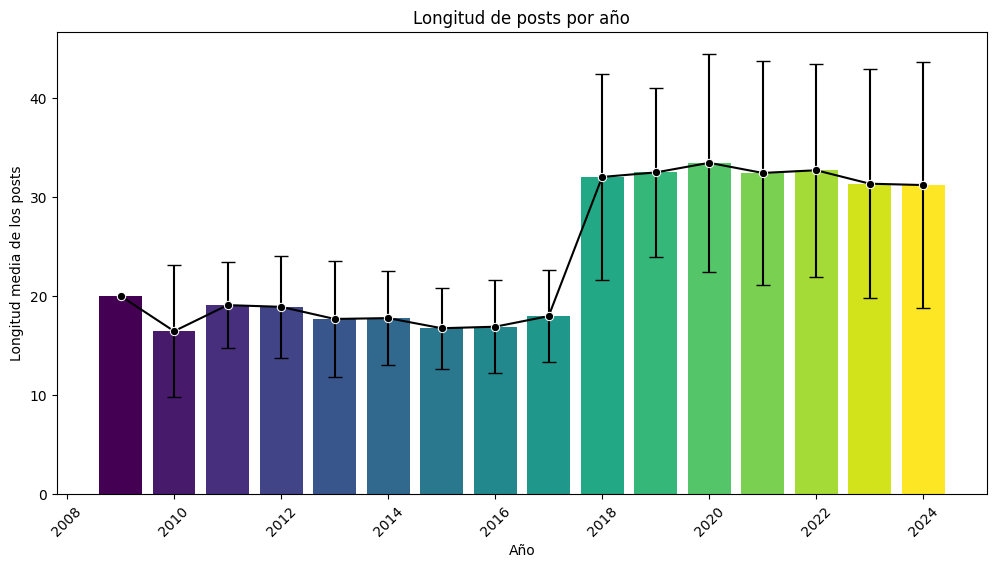

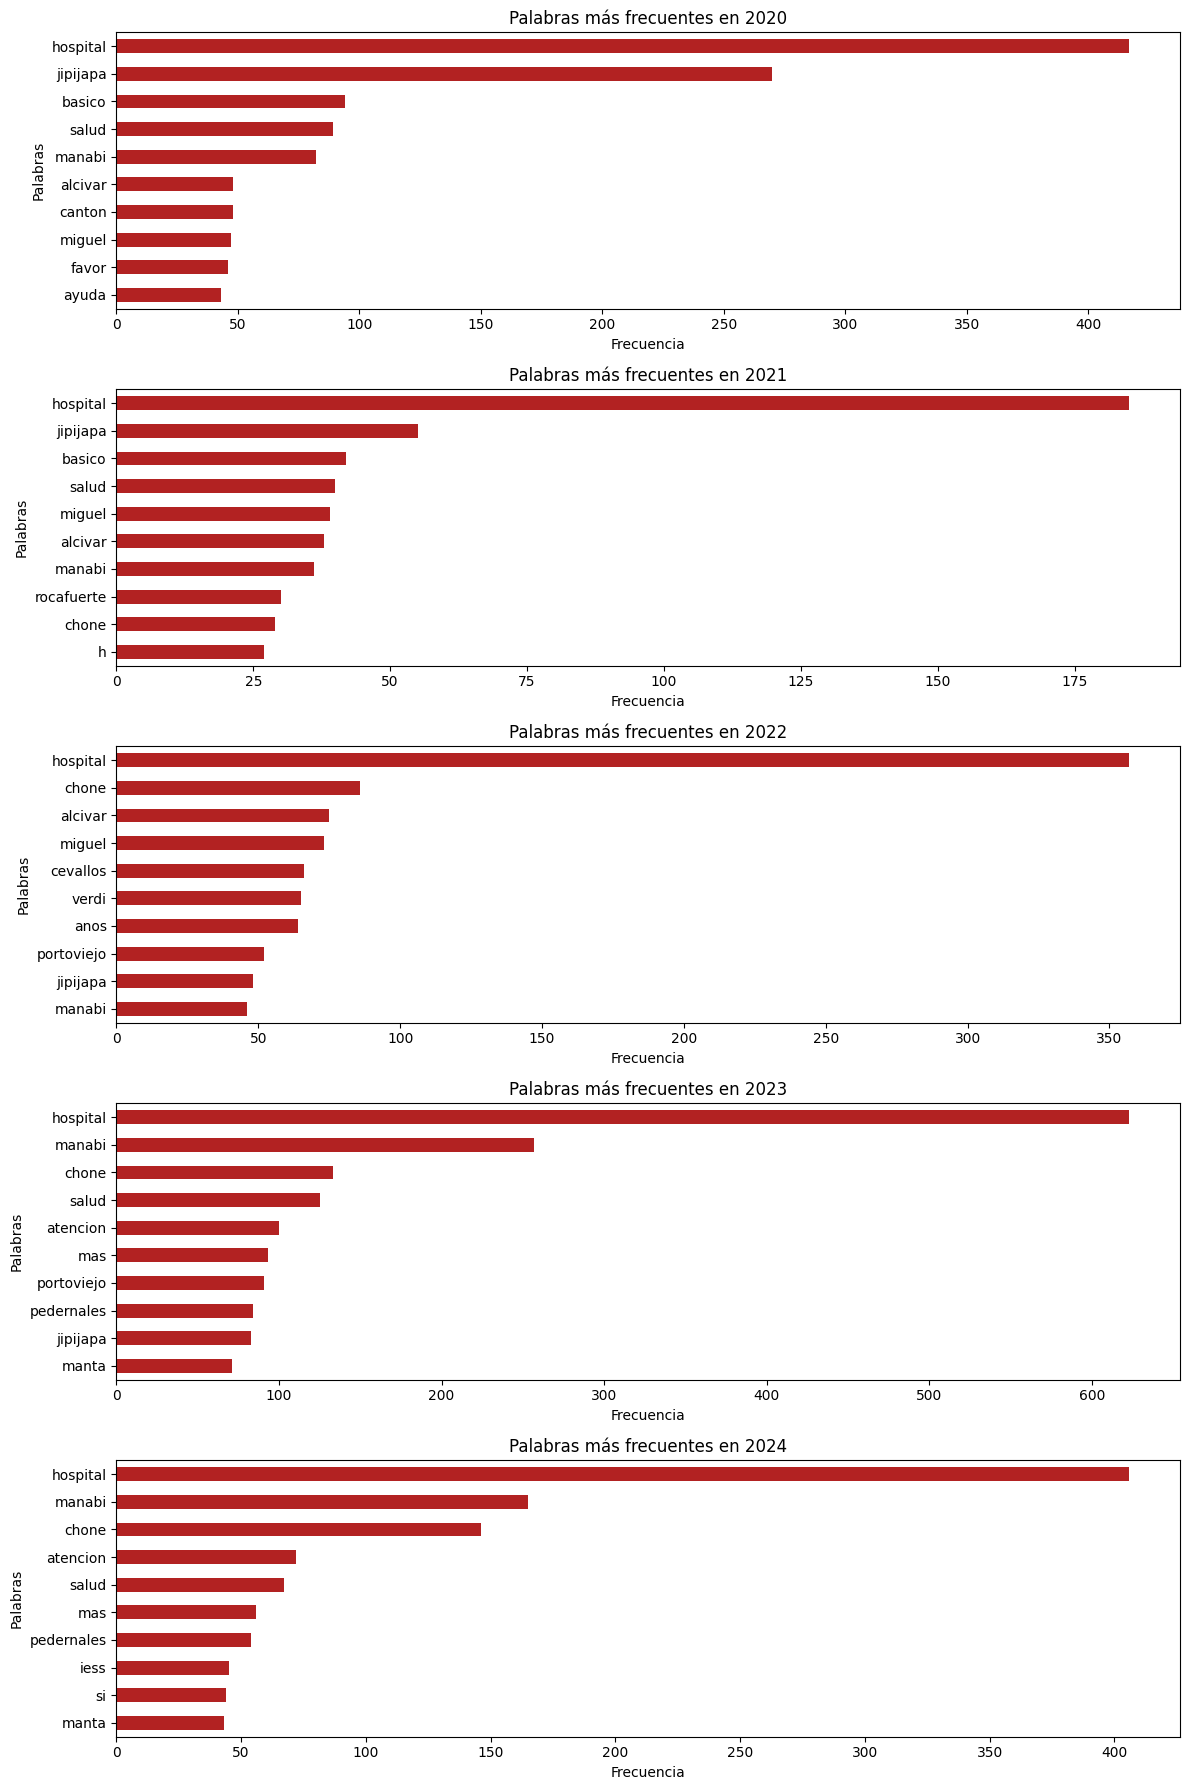

Datos de entrenamiento: (2014, 100)
Datos de validación: (432, 100)
Datos de prueba: (432, 100)


In [2]:
# Sección 1.5: Análisis Exploratorio
import json
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

# Descargar stopwords de nltk
nltk.download('stopwords')

# Obtener listado de stopwords en español
stop_words = list(stopwords.words('spanish'))
# Añadir stopwords adicionales si es necesario
stop_words.extend(["amp", "xa", "xe"])
print("Algunas stopwords en español:", stop_words[:10])

# Función para análisis exploratorio y guardar diccionario de palabras
def analisis_exploratorio(df):
    # Expandir la columna 'tokens'
    df_tidy = df.explode(column='tokens')
    
    # Filtrar para excluir stopwords
    df_tidy = df_tidy[~df_tidy["tokens"].isin(stop_words)]
    
    # Mapear palabras más frecuentes por año
    df_tidy['year'] = df_tidy['timestamp'].dt.year
    word_freq_by_year = df_tidy.groupby(['year', 'tokens']).size().reset_index(name='counts')
    
    # Crear un diccionario de palabras frecuentes por año
    word_dict = {}
    for year in word_freq_by_year['year'].unique():
        year_data = word_freq_by_year[word_freq_by_year['year'] == year]
        word_dict[str(year)] = dict(zip(year_data['tokens'], year_data['counts']))
    
    # Guardar diccionario en un archivo JSON
    with open('word_dict.json', 'w') as json_file:
        json.dump(word_dict, json_file)
    
    # Mostrar palabras más frecuentes por año
    print("Palabras más frecuentes por año (sin stopwords):")
    for year in word_dict:
        print(f"\nAño {year}:")
        print(sorted(word_dict[year].items(), key=lambda item: item[1], reverse=True)[:10])
    
    return df_tidy

# Realizar análisis exploratorio y guardar diccionario de palabras
df_tidy = analisis_exploratorio(df)

# Longitud media y desviación de los comentarios por año
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))
length_stats_by_year = df.groupby('year')['comment_length'].agg(['mean', 'std'])
print("\nLongitud media y desviación de los comentarios por año:")
print(length_stats_by_year)

# Crear gráfico de barras para la longitud media de los comentarios por año con barras de error
fig, ax = plt.subplots(figsize=(12, 6))
colores = plt.cm.viridis(np.linspace(0, 1, len(length_stats_by_year)))

# Gráfico de barras con barras de error
ax.bar(length_stats_by_year.index, length_stats_by_year['mean'], yerr=length_stats_by_year['std'], color=colores, capsize=5)

# Línea de tendencia de la longitud media
sns.lineplot(x=length_stats_by_year.index, y=length_stats_by_year['mean'], marker='o', ax=ax, color='black')

ax.set_title('Longitud de posts por año')
ax.set_xlabel('Año')
ax.set_ylabel('Longitud media de los posts')
plt.xticks(rotation=45)
plt.show()

# Visualización de las palabras más frecuentes por año para los últimos 5 años (2020-2024)
years_to_plot = [2020, 2021, 2022, 2023, 2024]

fig, axs = plt.subplots(nrows=len(years_to_plot), ncols=1, figsize=(12, 18))
for i, year in enumerate(years_to_plot):
    year_data = df_tidy[df_tidy['year'] == year]
    word_counts = year_data['tokens'].value_counts().head(10)
    word_counts.plot(kind='barh', ax=axs[i], color='firebrick')
    axs[i].invert_yaxis()
    axs[i].set_title(f'Palabras más frecuentes en {year}')
    axs[i].set_xlabel('Frecuencia')
    axs[i].set_ylabel('Palabras')

fig.tight_layout()
plt.show()

# Tokenización y Padding
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment_limpio'])
sequences = tokenizer.texts_to_sequences(df['comment_limpio'])
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=max_len)

# Mapeo de etiquetas de las 3 emociones básicas
sentimiento_mapping = {'positivo': 2, 'neutral': 1, 'negativo': 0}
df['sentimiento_mapeado'] = df['sentimiento'].map(sentimiento_mapping)

# Convertir las etiquetas a formato categórico
labels = to_categorical(df['sentimiento_mapeado'])

# División de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de validación: {X_val.shape}")
print(f"Datos de prueba: {X_test.shape}")

# Seccion 1.5.1 Matriz de Confusión SMOTE para Balanceo de Clases.

In [19]:
# Sección 1.5.1: Matriz de Confusión y SMOTE para Balanceo de Clases
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Verificar la distribución de clases en el conjunto de entrenamiento
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Determinar el número mínimo de muestras en las clases minoritarias
min_samples = min(class_distribution.values())

# Aplicar SMOTE al conjunto de datos de entrenamiento
print("Aplicando SMOTE para balanceo de clases...")
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=min(min_samples-1, 5))
X_train_smote, y_train_smote = smote.fit_resample(X_train, np.argmax(y_train, axis=1))

# Verificar el balance de clases después de SMOTE
unique, counts = np.unique(y_train_smote, return_counts=True)
print(f"Distribución de clases después de SMOTE: {dict(zip(unique, counts))}")

# Entrenar un modelo básico (Regresión Logística) para generar predicciones
model_baseline = LogisticRegression(max_iter=1000, random_state=42)
model_baseline.fit(X_train_smote, y_train_smote)

# Generar predicciones en el conjunto de prueba
y_pred = model_baseline.predict(X_test)

# Crear matriz de confusión
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Matriz de Confusión:")
print(cm)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sentimiento_mapping.keys(), yticklabels=sentimiento_mapping.keys())
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Generar reporte de clasificación
report = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=sentimiento_mapping.keys())
print("Reporte de Clasificación:")
print(report)

Aplicando SMOTE para balanceo de clases...


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5

# Sección 2: Análisis de Sentimientos con un enfoque lexico.

Primeros 5 términos del lexicón de sentimientos:
    palabra  puntuacion
0     culpa          -2
1    culpar          -2
2    aborda           1
3    abordo           1
4  abandona          -2
Ejemplos de comentarios con sus sentimientos calculados:
                                             comment  sentimiento_calculado
0  eso no es todo al realizarse la transferencia ...                     -2
1  nunca entregaste un hospital para la zona sur ...                      0
2  a mas de adefesio sinverguenza charlatan cuand...                     -1
3  jipijapa necesita un hospital general que pued...                      0
4  hay jente que tienen caca en el serebropor k v...                     -1
Ejemplos de comentarios con sus sentimientos sumados:
                                      username           timestamp  \
0  @ EnContraDeCorruptosDestructoresDeLaPatria 2024-02-28 14:16:20   
1                                   @1120nando 2020-05-06 21:38:28   
2                             

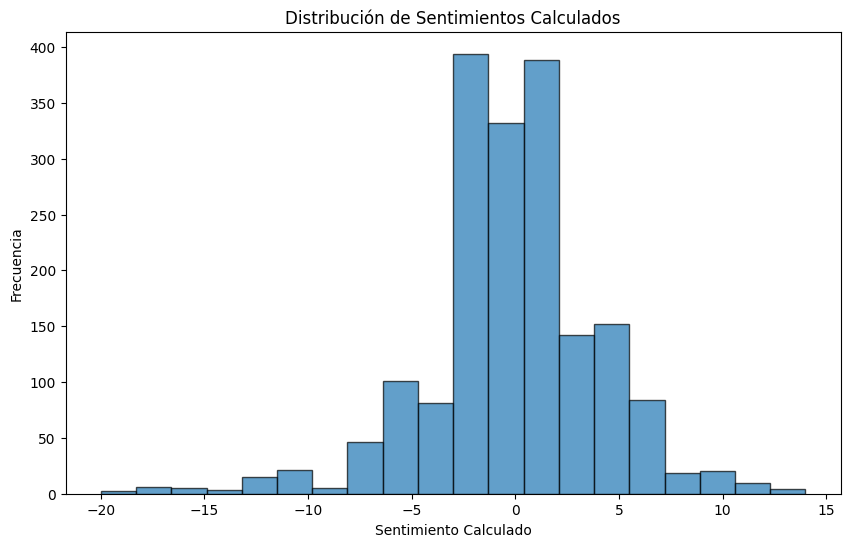

Perfil de Sentimientos de los Comentarios:
Positivos: 44.75%
Neutros  : 4.15%
Negativos: 51.09%


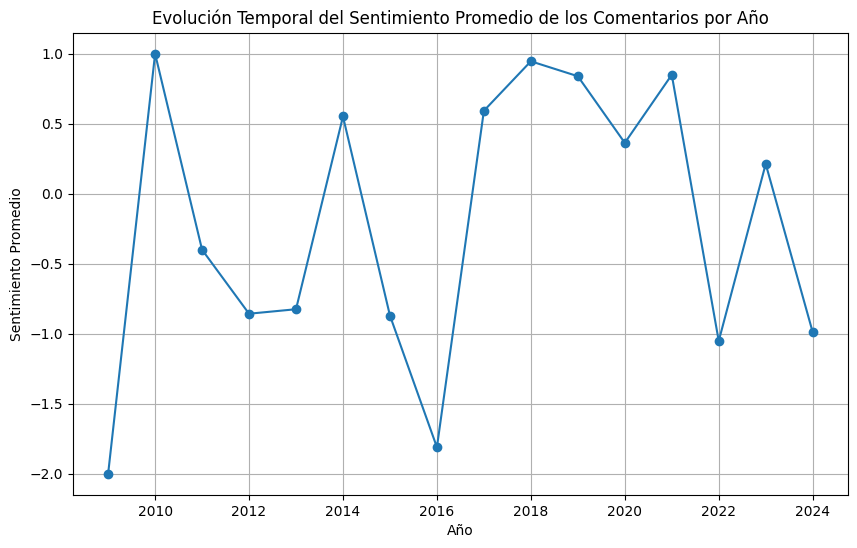

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el lexicón de sentimientos AFINN ajustado
lexicon_path = 'lexico_afinn.csv'
lexicon = pd.read_csv(lexicon_path, usecols=['palabra', 'puntuacion'])
print("Primeros 5 términos del lexicón de sentimientos:")
print(lexicon.head())

# Crear un diccionario a partir del lexicón para acceso rápido
lexicon_dict = dict(zip(lexicon['palabra'], lexicon['puntuacion']))

# Función para limpiar y tokenizar el texto
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    '''
    # Convertir todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[{}]'.format(re.escape(string.punctuation))
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split()
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return nuevo_texto

# Función para calcular el sentimiento de un texto
def calcular_sentimiento(texto):
    tokens = limpiar_tokenizar(texto)
    sentimiento = sum([lexicon_dict.get(token, 0) for token in tokens])
    return sentimiento

# Aplicar la función de sentimiento a los comentarios
df['sentimiento_calculado'] = df['comment_limpio'].apply(calcular_sentimiento)

# Mostrar algunos ejemplos de los comentarios con sus sentimientos calculados
print("Ejemplos de comentarios con sus sentimientos calculados:")
print(df[['comment', 'sentimiento_calculado']].head())

# Crear un DataFrame tidy para los comentarios y sus tokens
df_tidy = df.explode('tokens')

# Sentimiento promedio de cada comentario
tweets_sentimientos = pd.merge(
    left=df_tidy,
    right=lexicon,
    left_on="tokens", 
    right_on="palabra",
    how="inner"
)

tweets_sentimientos = tweets_sentimientos.drop(columns="palabra")

# Se suman los sentimientos de las palabras que forman cada comentario.
tweets_sentimientos = tweets_sentimientos[["username", "timestamp", "comment", "puntuacion"]] \
                      .groupby(["username", "timestamp", "comment"]) \
                      .sum().reset_index()

# Mostrar algunos ejemplos de los comentarios con sus sentimientos sumados
print("Ejemplos de comentarios con sus sentimientos sumados:")
print(tweets_sentimientos.head())

# Visualización de la distribución de sentimientos
plt.figure(figsize=(10, 6))
plt.hist(tweets_sentimientos['puntuacion'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Sentimientos Calculados')
plt.xlabel('Sentimiento Calculado')
plt.ylabel('Frecuencia')
plt.show()

# Calcular porcentajes de comentarios positivos, negativos y neutros
def perfil_sentimientos(df):
    positivos = round(100 * np.mean(df['puntuacion'] > 0), 2)
    neutros = round(100 * np.mean(df['puntuacion'] == 0), 2)
    negativos = round(100 * np.mean(df['puntuacion'] < 0), 2)
    print(f"Positivos: {positivos}%")
    print(f"Neutros  : {neutros}%")
    print(f"Negativos: {negativos}%")

print("Perfil de Sentimientos de los Comentarios:")
perfil_sentimientos(tweets_sentimientos)

# Convertir la columna 'timestamp' a formato de fecha
tweets_sentimientos['timestamp'] = pd.to_datetime(tweets_sentimientos['timestamp'])

# Agrupar por año y calcular el sentimiento promedio
tweets_sentimientos['year'] = tweets_sentimientos['timestamp'].dt.year
sentimientos_anuales = tweets_sentimientos.groupby('year')['puntuacion'].mean()

# Visualización de la evolución temporal del sentimiento promedio por año
plt.figure(figsize=(10, 6))
plt.plot(sentimientos_anuales.index, sentimientos_anuales.values, marker='o', linestyle='-')
plt.title('Evolución Temporal del Sentimiento Promedio de los Comentarios por Año')
plt.xlabel('Año')
plt.ylabel('Sentimiento Promedio')
plt.grid(True)
plt.show()

# Sección 3: Definición y Entrenamiento del Modelo LSTM.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Attention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Definir parámetros
max_words = 10000
max_len = 100
embedding_dim = 100

# Tokenizar y preparar los datos
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment_limpio'])
sequences = tokenizer.texts_to_sequences(df['comment_limpio'])
text_data = pad_sequences(sequences, maxlen=max_len)

# Crear secuencias de sentimientos usando el diccionario de léxico
def generar_sentiment_sequences(texto):
    tokens = limpiar_tokenizar(texto)
    return [lexicon_dict.get(token, 0) for token in tokens]

sentiment_sequences = df['comment_limpio'].apply(generar_sentiment_sequences)
sentiment_data = pad_sequences(sentiment_sequences, maxlen=max_len)

# Mapeo de etiquetas de las 3 emociones básicas
sentimiento_mapping = {'positivo': 2, 'neutral': 1, 'negativo': 0}
df['sentimiento_mapeado'] = df['sentimiento'].map(sentimiento_mapping)
labels = to_categorical(df['sentimiento_mapeado'])

# División de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(text_data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Función para construir el modelo LSTM mejorado con léxico y atención
def construir_modelo(max_words, max_len, embedding_dim):
    # Input layers
    input_text = Input(shape=(max_len,), name='input_text')
    input_sentiment = Input(shape=(max_len,), name='input_sentiment')
    
    # Embedding layer para los comentarios
    embedding_text = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, name='embedding_text')(input_text)
    
    # Embedding layer para los sentimientos
    embedding_sentiment = Embedding(input_dim=max_words, output_dim=1, input_length=max_len, name='embedding_sentiment')(input_sentiment)
    
    # Concatenar las dos embeddings
    combined = Concatenate(name='concatenate')([embedding_text, embedding_sentiment])
    
    # LSTM layer
    lstm_out = LSTM(units=128, return_sequences=True, name='lstm')(combined)
    
    # Attention mechanism
    attention = Attention(name='attention')([lstm_out, lstm_out])
    attention = GlobalAveragePooling1D()(attention)
    
    # Fully connected layer
    dense_out = Dense(64, activation='relu', name='dense')(attention)
    output = Dense(3, activation='softmax', name='output')(dense_out)
    
    # Model definition
    model = Model(inputs=[input_text, input_sentiment], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Definir el modelo
model = construir_modelo(max_words, max_len, embedding_dim)

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(
    [X_train, X_train],
    y_train,
    validation_data=([X_val, X_val], y_val),
    epochs=10,
    batch_size=64
)

# Evaluación del modelo
loss, accuracy = model.evaluate([X_test, X_test], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

C:\Users\Erick Carreño\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)       │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_sentiment (InputLayer)  │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_text (Embedding)    │ (None, 100, 100)          │       1,000,000 │ input_text[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_sentiment           │ (None, 100, 1)            │          10,000 │ input_sentiment[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 100, 101)          │               0 │ embedding_text[0][0],      │
│                               │                           │                 │ embedding_sentiment[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 100, 128)          │         117,760 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention (Attention)         │ (None, 100, 128)          │               0 │ lstm[0][0], lstm[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_1    │ (None, 128)               │               0 │ attention[0][0]            │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │           8,256 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 3)                 │             195 │ dense[0][0]                │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,136,211 (4.33 MB)

 Trainable params: 1,136,211 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 0.8542 - loss: 0.4409 - val_accuracy: 0.9792 - val_loss: 0.1055
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.9739 - loss: 0.1339 - val_accuracy: 0.9792 - val_loss: 0.1054
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.9742 - loss: 0.1336 - val_accuracy: 0.9792 - val_loss: 0.1139
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.9733 - loss: 0.1375 - val_accuracy: 0.9792 - val_loss: 0.1047
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.9680 - loss: 0.1547 - val_accuracy: 0.9792 - val_loss: 0.1033
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9713 - loss: 0.1404 - val_accuracy: 0.9792 - val_loss: 0.1096
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.9771 - loss: 0.1191 - val_accuracy: 0.9792 - val_loss: 0.1043
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.9730 - loss: 0.1335 - val_accuracy: 0

# Seccion 4: Evaluacion del Modelo y Generar Matriz de Confusión.

# Sección 5: Visualización y Resultados

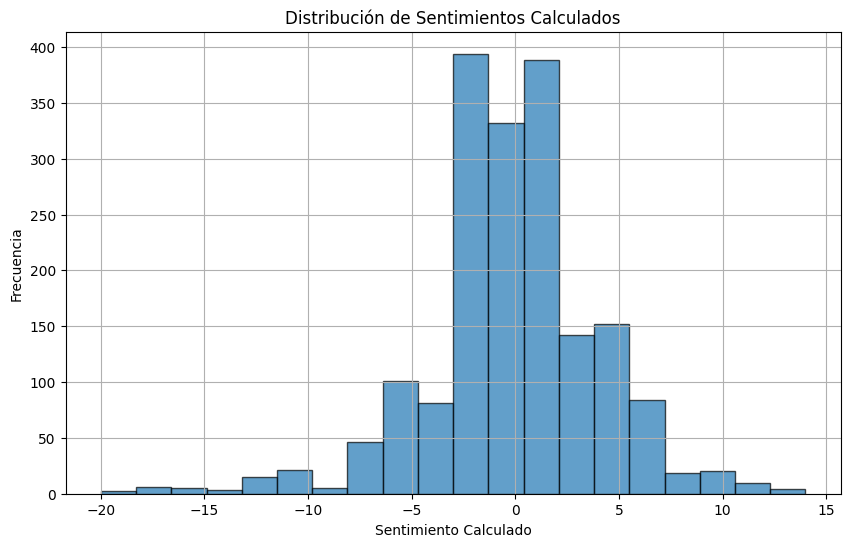

Perfil de Sentimientos de los Comentarios:
Positivos: 44.75%
Neutros  : 4.15%
Negativos: 51.09%


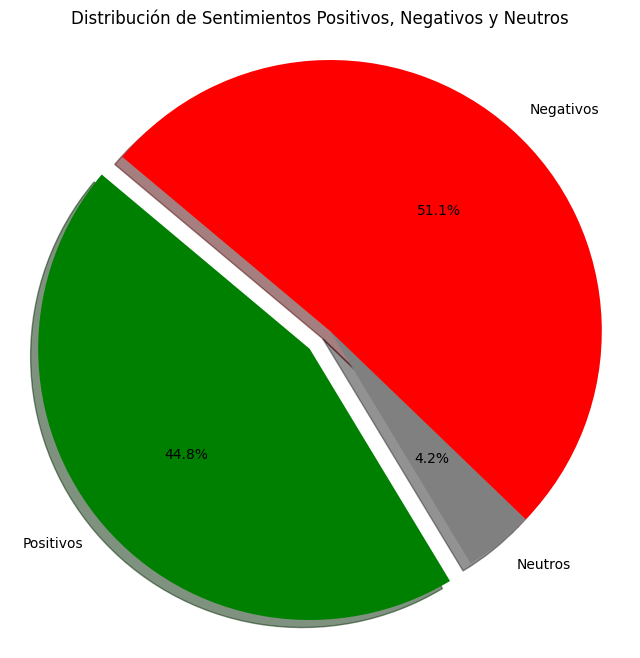

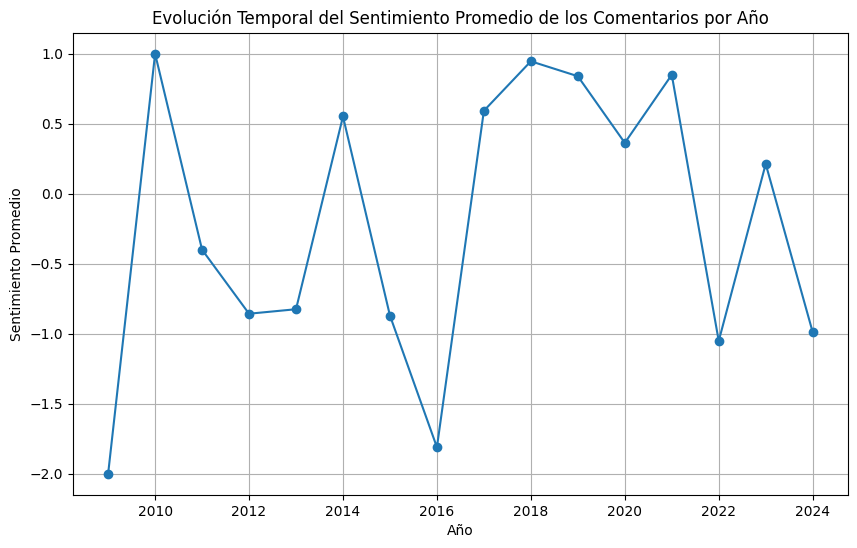

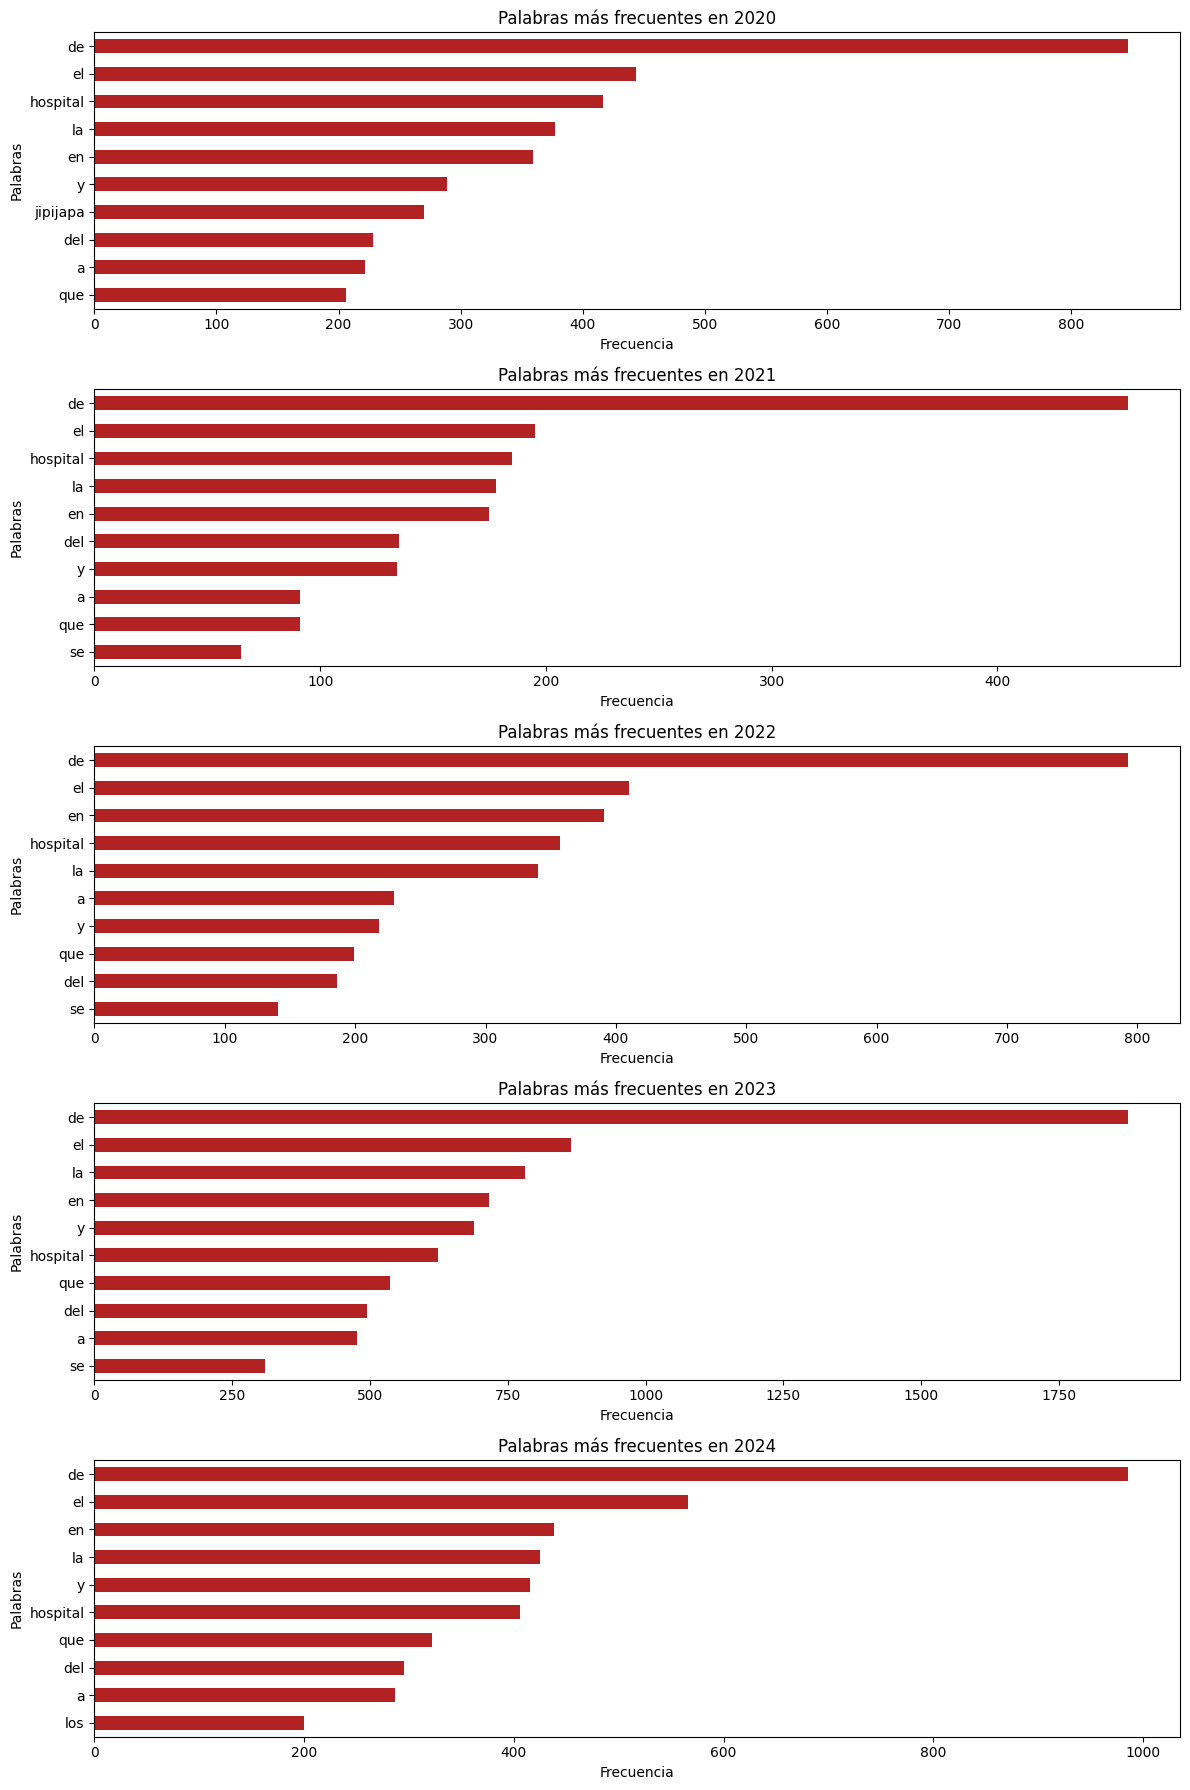

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para crear gráficos y visualizar los resultados
def visualizar_resultados(df, tweets_sentimientos, sentimientos_anuales):
    # Visualización de la distribución de sentimientos calculados
    plt.figure(figsize=(10, 6))
    plt.hist(tweets_sentimientos['puntuacion'], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Distribución de Sentimientos Calculados')
    plt.xlabel('Sentimiento Calculado')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # Perfil de Sentimientos de los Comentarios
    def perfil_sentimientos(df):
        positivos = round(100 * np.mean(df['puntuacion'] > 0), 2)
        neutros = round(100 * np.mean(df['puntuacion'] == 0), 2)
        negativos = round(100 * np.mean(df['puntuacion'] < 0), 2)
        print(f"Positivos: {positivos}%")
        print(f"Neutros  : {neutros}%")
        print(f"Negativos: {negativos}%")
        return positivos, neutros, negativos

    print("Perfil de Sentimientos de los Comentarios:")
    positivos, neutros, negativos = perfil_sentimientos(tweets_sentimientos)

    # Gráfica de distribución de sentimientos positivos, negativos y neutros
    labels = ['Positivos', 'Neutros', 'Negativos']
    sizes = [positivos, neutros, negativos]
    colors = ['green', 'gray', 'red']
    explode = (0.1, 0, 0)  # explode 1st slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Distribución de Sentimientos Positivos, Negativos y Neutros')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # Evolución temporal del sentimiento promedio por año
    plt.figure(figsize=(10, 6))
    plt.plot(sentimientos_anuales.index, sentimientos_anuales.values, marker='o', linestyle='-')
    plt.title('Evolución Temporal del Sentimiento Promedio de los Comentarios por Año')
    plt.xlabel('Año')
    plt.ylabel('Sentimiento Promedio')
    plt.grid(True)
    plt.show()

    # Gráfica de barras para las palabras más frecuentes por año (últimos 5 años)
    years_to_plot = [2020, 2021, 2022, 2023, 2024]
    fig, axs = plt.subplots(nrows=len(years_to_plot), ncols=1, figsize=(12, 18))
    for i, year in enumerate(years_to_plot):
        year_data = df_tidy[df_tidy['year'] == year]
        word_counts = year_data['tokens'].value_counts().head(10)
        word_counts.plot(kind='barh', ax=axs[i], color='firebrick')
        axs[i].invert_yaxis()
        axs[i].set_title(f'Palabras más frecuentes en {year}')
        axs[i].set_xlabel('Frecuencia')
        axs[i].set_ylabel('Palabras')

    fig.tight_layout()
    plt.show()

# Datos y gráficos utilizados en las secciones anteriores
lexicon_path = 'lexico_afinn.csv'
lexicon = pd.read_csv(lexicon_path, usecols=['palabra', 'puntuacion'])

# Crear un diccionario a partir del lexicón para acceso rápido
lexicon_dict = dict(zip(lexicon['palabra'], lexicon['puntuacion']))

# Función para limpiar y tokenizar el texto
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    '''
    # Convertir todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[{}]'.format(re.escape(string.punctuation))
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split()
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return nuevo_texto

# Función para calcular el sentimiento de un texto
def calcular_sentimiento(texto):
    tokens = limpiar_tokenizar(texto)
    sentimiento = sum([lexicon_dict.get(token, 0) for token in tokens])
    return sentimiento

# Aplicar la función de sentimiento a los comentarios
df['sentimiento_calculado'] = df['comment_limpio'].apply(calcular_sentimiento)

# Crear un DataFrame tidy para los comentarios y sus tokens
df_tidy = df.explode('tokens')

# Sentimiento promedio de cada comentario
tweets_sentimientos = pd.merge(
    left=df_tidy,
    right=lexicon,
    left_on="tokens", 
    right_on="palabra",
    how="inner"
)

tweets_sentimientos = tweets_sentimientos.drop(columns="palabra")

# Se suman los sentimientos de las palabras que forman cada comentario.
tweets_sentimientos = tweets_sentimientos[["username", "timestamp", "comment", "puntuacion"]] \
                      .groupby(["username", "timestamp", "comment"]) \
                      .sum().reset_index()

# Convertir la columna 'timestamp' a formato de fecha
tweets_sentimientos['timestamp'] = pd.to_datetime(tweets_sentimientos['timestamp'])

# Agrupar por año y calcular el sentimiento promedio
tweets_sentimientos['year'] = tweets_sentimientos['timestamp'].dt.year
sentimientos_anuales = tweets_sentimientos.groupby('year')['puntuacion'].mean()

# Llamar a la función para visualizar los resultados
visualizar_resultados(df, tweets_sentimientos, sentimientos_anuales)